# Importing libraries

* pandas library is used to read, view, and manipulate datasets in tabular form.
* NumPy is used for mathematical operations and numerical calculations.
* Matplotlib is used for data visualization .

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Below Cell reads Titanic xlsx  and stores it into a DataFrame named df .

In [2]:
df=pd.read_excel(r"D:\sujal class\Data Analysis project\Titanic\Titanic.xlsx")

Head dispaly the first 5 rows of the dataset .

In [3]:
df.head()

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0


Column Description :-
* PassengerId: Unique identification number for each passenger
* Survived: Shows whether the passenger survived (1 = Yes, 0 = No)
* Pclass: Passenger class (1st, 2nd, or 3rd class)
* Name: Name of the passenger
* Sex: Gender of the passenger
* Age: Age of the passenger
* SibSp: Number of siblings or spouses traveling with the passenger
* Parch: Number of parents or children traveling with the passenger
* Ticket: Ticket number
* Fare: Ticket fare paid by the passenger
* Cabin: Cabin number
* Embarked: Port where the passenger boarded the ship

Info method gives information about the dataset.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Name         891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Survived     891 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Shape method shows the numbers of rows and columns in the dataset .

In [5]:
df.shape

(891, 12)

Describe method is used to get a summery of the dataset .

In [6]:
df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208,0.383838
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429,0.486592
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


Below cell checks how many missing values are present in each column.

In [7]:
df.isnull().sum()

PassengerId      0
Name             0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Survived         0
dtype: int64

In this step, missing values in the Age column are handled. Some passengers do not have their age recorded in the dataset, which can cause problems during analysis. To fix this, the missing age values are filled using the median age of all passengers. The median is used because it gives a central value and is not affected much by extreme values. This helps in keeping the data complete and suitable for further analysis.

In [8]:
df['Age'] = df['Age'].fillna(df['Age'].median())

In [9]:
df.isnull().sum()

PassengerId      0
Name             0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Survived         0
dtype: int64

In this step, missing values in the Embarked column are handled. The Embarked column shows the port from which the passenger boarded the ship, and a few records have this information missing. To fix this, the missing values are filled with the most common port, which is called the mode. This ensures that the column has no missing values and keeps the data consistent for analysis.

In [10]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [11]:
df.isnull().sum()

PassengerId      0
Name             0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Survived         0
dtype: int64

In this step, the Survived column is analyzed to count how many passengers survived and how many did not survive. The value_counts() function is used to calculate the total number of passengers in each category. This summary helps in understanding the survival distribution and is later used to plot the bar graph.

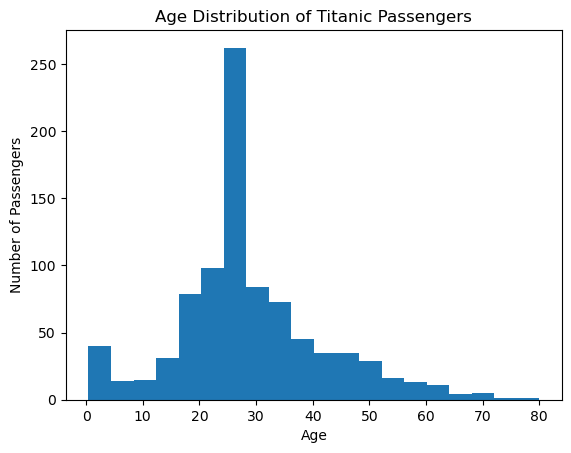

In [25]:
plt.hist(df['Age'], bins=20)
plt.xlabel("Age")
plt.ylabel("Number of Passengers")
plt.title("Age Distribution of Titanic Passengers")
plt.show()

In [12]:
survived = df['Survived'].value_counts()

In this step, a bar graph is created to visually represent the survival count of passengers. The bar chart uses the previously calculated survival data, where one bar represents passengers who did not survive and the other represents those who survived. Different colors are used to clearly distinguish between the two categories. The x-axis shows the survival status, and the y-axis shows the number of passengers. This graph makes it easy to understand the overall survival pattern of the Titanic passengers.

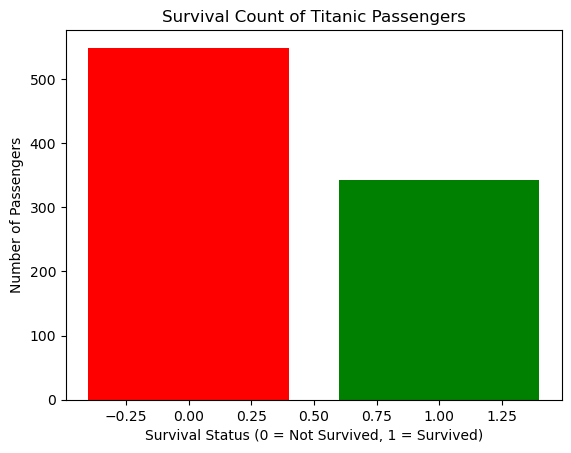

In [13]:
plt.bar(survived.index, survived.values, color=['red', 'green'])
plt.xlabel("Survival Status (0 = Not Survived, 1 = Survived)")
plt.ylabel("Number of Passengers")
plt.title("Survival Count of Titanic Passengers")
plt.show()

In this step, a new column called FamilySize is created to represent the total number of family members traveling with each passenger. This is calculated by adding the number of siblings or spouses (SibSp) and the number of parents or children (Parch), and then adding one to include the passenger themselves. This new feature helps in understanding whether passengers were traveling alone or with their family.

In [14]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

In [15]:
df.head()

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,FamilySize
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,2
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1,2
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1,2
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0,1


In this step, a new column named IsAlone is created to check whether a passenger was traveling alone or with family members. If the family size is equal to one, it means the passenger was alone, so the value is set to 1. If the family size is more than one, the value is set to 0. This helps in analyzing how traveling alone or with family affected passenger survival.

In [16]:
df['IsAlone'] = np.where(df['FamilySize'] == 1, 1, 0)

In [17]:
df.head()

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,FamilySize,IsAlone
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,2,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1,2,0
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1,2,0
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0,1,1


In this step, unnecessary columns are removed from the dataset. The Name, Ticket, and Cabin columns are dropped because they do not directly help in understanding or predicting passenger survival for this analysis. Removing these columns helps in simplifying the dataset and keeping only the useful information for further analysis.

In [18]:
df.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [19]:
df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived,FamilySize,IsAlone
0,1,3,male,22.0,1,0,7.2500,S,0,2,0
1,2,1,female,38.0,1,0,71.2833,C,1,2,0
2,3,3,female,26.0,0,0,7.9250,S,1,1,1
3,4,1,female,35.0,1,0,53.1000,S,1,2,0
4,5,3,male,35.0,0,0,8.0500,S,0,1,1


In [21]:
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

In [22]:
df.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived,FamilySize,IsAlone,Sex_male,Embarked_Q,Embarked_S
0,1,3,22.0,1,0,7.2500,0,2,0,1,0,1
1,2,1,38.0,1,0,71.2833,1,2,0,0,0,0
2,3,3,26.0,0,0,7.9250,1,1,1,0,0,1
3,4,1,35.0,1,0,53.1000,1,2,0,0,0,1
4,5,3,35.0,0,0,8.0500,0,1,1,1,0,1


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Sex          891 non-null    object 
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   Embarked     891 non-null    object 
 8   Survived     891 non-null    int64  
 9   FamilySize   891 non-null    int64  
 10  IsAlone      891 non-null    int32  
dtypes: float64(2), int32(1), int64(6), object(2)
memory usage: 73.2+ KB
